In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/MSc/SEMESTER 3/NLP/Tweets.csv')
df.sample(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
13675,5.697550e+17,negative,1.0000,Flight Booking Problems,0.6796,American,NaN,AminahAMajeed,NaN,0,@AmericanAir I'm in MEX. I need to fly to New...,NaN,22-02-2015 23:06,"New York, NY",Eastern Time (US & Canada)
7100,5.699370e+17,negative,1.0000,Can't Tell,0.6802,Delta,NaN,kenyaaroy,NaN,0,“@JetBlue: Our fleet's on fleek. http://t.co/5...,NaN,23-02-2015 11:10,NaN,Central Time (US & Canada)
8338,5.684740e+17,neutral,0.6786,NaN,NaN,Delta,NaN,slevine17,NaN,0,@JetBlue Sent my suggestion and comments via t...,NaN,19-02-2015 10:14,NaN,NaN
4030,5.678630e+17,negative,1.0000,Late Flight,1.0000,United,NaN,legendjohn11,NaN,0,@united 3875 to Denver which we are supposed t...,NaN,17-02-2015 17:48,NaN,NaN
8523,5.681930e+17,positive,1.0000,NaN,NaN,Delta,NaN,TheTechRabbi,NaN,0,@JetBlue I can't say what airline I am on righ...,NaN,18-02-2015 15:38,Los Angeles,Pacific Time (US & Canada)
3781,5.681300e+17,negative,1.0000,Late Flight,0.3557,United,NaN,theo,NaN,1,@united Just had the worst experience ever fly...,NaN,18-02-2015 11:28,São Paulo / Brasil,Brasilia
14327,5.696330e+17,negative,1.0000,Cancelled Flight,0.6672,American,NaN,tim_sheehy,NaN,0,@AmericanAir five times at last count,NaN,22-02-2015 14:59,Washington DC,Central Time (US & Canada)
541,5.702880e+17,negative,0.6495,Can't Tell,0.6495,United,NaN,lotusfitness,NaN,0,@united #Newarkliberty Airport need to indicat...,NaN,24-02-2015 10:25,"Washington, DC",Eastern Time (US & Canada)
4553,5.700330e+17,negative,1.0000,Lost Luggage,1.0000,Southwest,NaN,HDsportsguy,NaN,0,@SouthwestAir when I called I was told my bag ...,NaN,23-02-2015 17:30,NaN,NaN
9923,5.696140e+17,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,_Leycar,NaN,0,@USAirways has the WORST customer service and ...,NaN,22-02-2015 13:47,NaN,Eastern Time (US & Canada)


In [3]:
df.shape

(14640, 15)

In [4]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [5]:
df = df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis= 1)

In [6]:
df.shape

(14640, 12)

In [7]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({'Missed_Values' : missed_values ,
                              'Missed_Values %' :missed_values_percent,
                              'Duplicated values' :duplicated_values,
                              'Duplicated values %':duplicated_values_percent})
    return info_frame.T

In [8]:
show_details(df)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
Missed_Values,0.000000,0.000000,0.000000,5462.000000,4118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4733.000000,4820.000000
Missed_Values %,0.000000,0.000000,0.000000,0.373087,0.281284,0.000000,0.000000,0.000000,0.000000,0.000000,0.323292,0.329235
Duplicated values,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
Duplicated values %,0.002664,0.002664,0.002664,0.002664,0.002664,0.002664,0.002664,0.002664,0.002664,0.002664,0.002664,0.002664


In [9]:
df.shape

(14640, 12)

In [10]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

# ***RNN***

In [11]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,24-02-2015 11:15,NaN,Pacific Time (US & Canada)


In [12]:
mode = df.airline_sentiment.value_counts()
mode.to_frame().T

airline_sentiment,negative,neutral,positive
count,9178,3099,2363


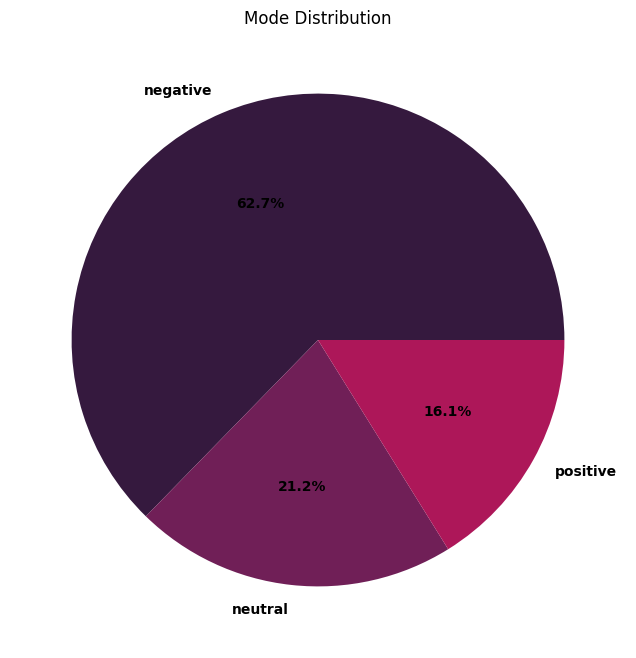

In [16]:
plt.figure(figsize=(10,8))
plt.pie(x = mode.values , labels=mode.keys() ,autopct="%1.1f%%" ,
textprops={"fontsize":10,"fontweight":"black"},colors=sns.color_palette("rocket"))
plt.title('Mode Distribution')
plt.show()

In [18]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

Stemmer = PorterStemmer()


pattern = r'[^a-zA-Z0-9\s]'


stopwords_list = set(stopwords.words('english'))

def stopwords_cleaner(text, stopwords_list):

    text = re.sub(pattern, '', text)

    words = [Stemmer.stem(word) for word in text.split() if word not in stopwords_list]
    cleaned_text = ' '.join(words)
    return cleaned_text

df['text'] = df['text'].apply(lambda x: stopwords_cleaner(x, stopwords_list))
df


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,virginamerica what dhepburn said,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,virginamerica plu youv ad commerci experi tacki,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,virginamerica i didnt today must mean i need t...,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,virginamerica realli aggress blast obnoxi ente...,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,virginamerica realli big bad thing,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,5.695880e+17,positive,0.3487,NaN,0.0000,American,KristenReenders,0,americanair thank got differ flight chicago,22-02-2015 12:01,NaN,NaN
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,americanair leav 20 minut late flight no warn ...,22-02-2015 11:59,Texas,NaN
14637,5.695870e+17,neutral,1.0000,NaN,NaN,American,sanyabun,0,americanair pleas bring american airlin blackb...,22-02-2015 11:59,"Nigeria,lagos",NaN
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,americanair money chang flight dont answer pho...,22-02-2015 11:59,New Jersey,Eastern Time (US & Canada)


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=100) 

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['airline_sentiment'])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [26]:
max_len = 100

model  = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 100}